# SuperScreen Logo

In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
import logging

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.interpolate import splprep, splev

import superscreen as sc

logging.basicConfig(level=logging.INFO)

SAVE = False

In [2]:
fontprops = fm.FontProperties(weight="bold", family="sans-serif")
path = mpl.textpath.TextPath((0, 0), "S", size=10, prop=fontprops)

In [3]:
s_points = 251

t = np.linspace(0, 1, 11)
segments = [bezier(t) for bezier, _ in path.iter_bezier()]
points = np.concatenate(segments)
points[:, 0] -= points[:, 0].mean()
points[:, 1] -= points[:, 1].mean()
_, ix = np.unique(points, axis=0, return_index=True)
points = points[np.sort(ix)]
tck, u = splprep(points.T, k=1, s=0)
x, y = splev(np.linspace(0, 1, s_points), tck)
points = np.stack([x, y], axis=1)[1:]

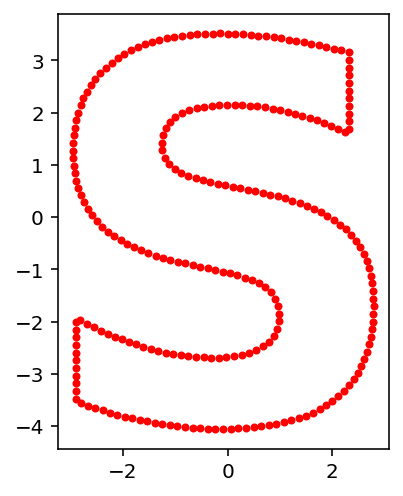

In [4]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(*points.T, "r.")

In [5]:
layers = [
    sc.Layer("base", Lambda=1, z0=0),
]

films = [
    sc.Polygon("S", layer="base", points=points),
]

abstract_regions = [
    sc.Polygon(
        "bounding_box",
        layer="base",
        points=sc.geometry.circle(4.75, center=(0, -0.35)),
    ),
]

device = sc.Device(
    "S",
    layers=layers,
    films=films,
    abstract_regions=abstract_regions,
)

<AxesSubplot:xlabel='$x$ $[\\mathrm{µm}]$', ylabel='$y$ $[\\mathrm{µm}]$'>

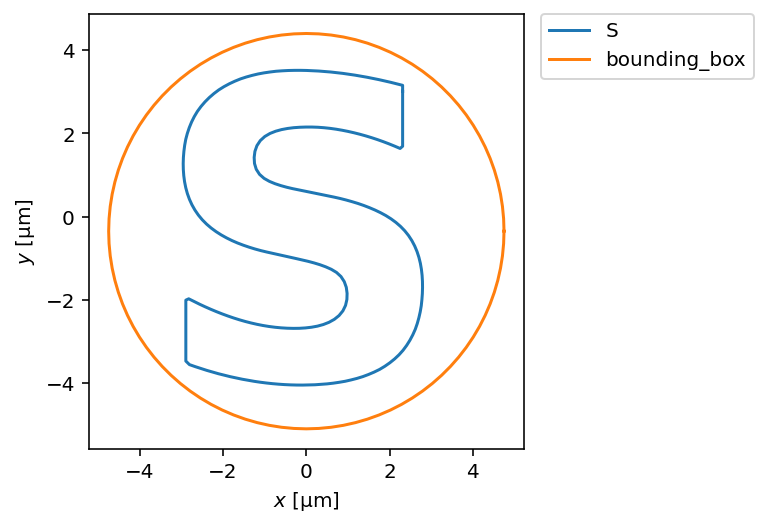

In [6]:
device.plot_polygons()

In [7]:
device.make_mesh(min_triangles=5_000, optimesh_steps=None)

INFO:superscreen.device:Generating mesh...
INFO:superscreen.device:Finished generating mesh with 2733 points and 5282 triangles.
INFO:superscreen.device:Calculating weight matrix.
INFO:superscreen.device:Calculating Laplace operator.
INFO:superscreen.device:Calculating kernel matrix.


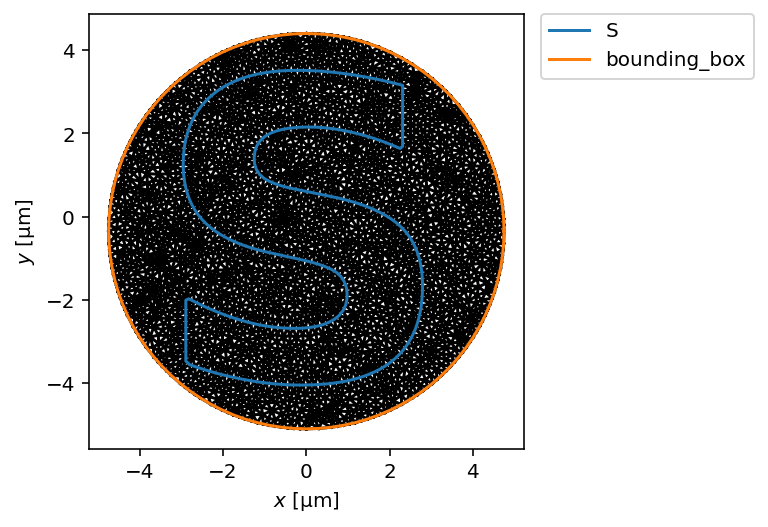

In [8]:
ax = device.plot_mesh(color="k", alpha=1)
ax = device.plot_polygons(ax=ax)

In [9]:
applied_field = sc.sources.ConstantField(1)

solutions = sc.solve(
    device=device,
    applied_field=applied_field,
    field_units="mT",
)

INFO:superscreen.brandt:Calculating base response to applied field.


In [10]:
fig_formats = ["png"]

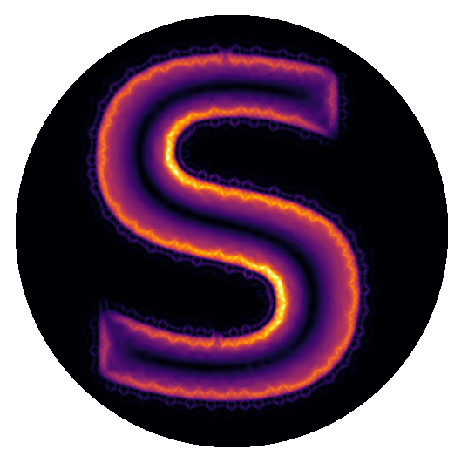

In [11]:
fig, axes = solutions[-1].plot_currents(
    grid_shape=500, streamplot=False, vmin=0, vmax=750, colorbar=False
)

for a in axes:
    a.axis("off")
    a.set_title("")
    
if SAVE:
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_currents.{fmt}", dpi=600, bbox_inches="tight")

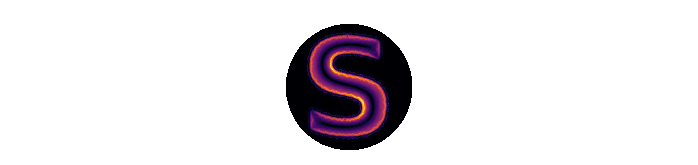

In [12]:
fig, axes = solutions[-1].plot_currents(
    grid_shape=500, streamplot=False, vmin=0, vmax=800, colorbar=False,
)

for a in axes:
    a.axis("off")
    a.set_title("")
    a.set_xlim(-25, 25)
    a.set_ylim(-5.1, 5.1)
    
if SAVE:
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_currents_small.{fmt}", dpi=600, bbox_inches="tight")

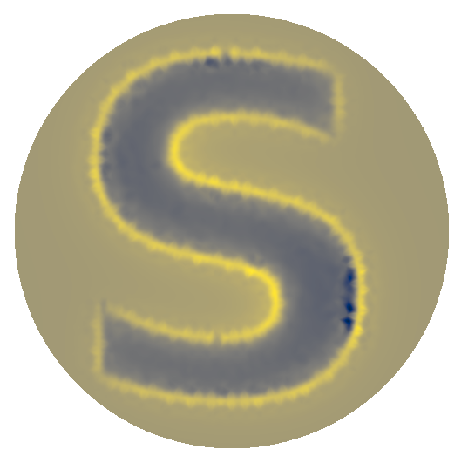

In [13]:
fig, axes = solutions[-1].plot_fields(grid_shape=500, colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")
    
if SAVE:
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_fields.{fmt}", dpi=600, bbox_inches="tight")

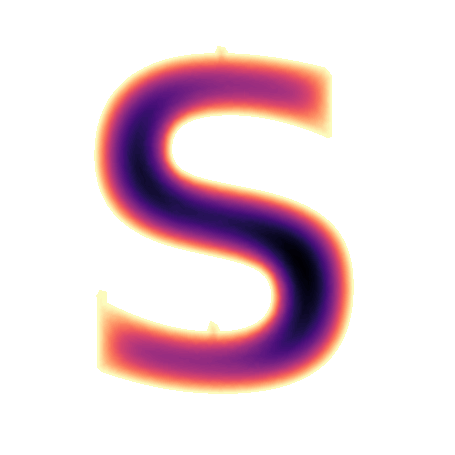

In [14]:
fig, axes = solutions[-1].plot_streams(colorbar=False)

for a in axes:
    a.axis("off")
    a.set_title("")
    
if SAVE:
    for fmt in fig_formats:
        fig.savefig(f"../images/logo_streams.{fmt}", dpi=600, bbox_inches="tight")

In [15]:
sc.version_table()

Software,Version
SuperScreen,0.1.1
Numpy,1.20.3
SciPy,1.6.3
matplotlib,3.4.3
ray,1.4.1
IPython,7.24.1
Python,"3.9.5 (default, May 18 2021, 12:31:01) [Clang 10.0.0 ]"
OS,posix [darwin]
Number of CPUs,"Physical: 2, Logical: 4"
BLAS Info,OPENBLAS
